In [10]:
from pyspark.sql import functions as F
from pyspark.sql import SparkSession

In [11]:
spark = SparkSession.builder.appName("StreamingAnalytics").getOrCreate()

# Load each dataset
hulu_df = spark.read.csv("hdfs://localhost:9000/user/hduser/streaming_datasets/hulu_titles.csv", header=True)
disney_df = spark.read.csv("hdfs://localhost:9000/user/hduser/streaming_datasets/disney_plus_titles.csv", header=True)
amazon_df = spark.read.csv("hdfs://localhost:9000/user/hduser/streaming_datasets/amazon_prime_titles.csv", header=True)
netflix_df = spark.read.csv("hdfs://localhost:9000/user/hduser/streaming_datasets/netflix_titles.csv", header=True)


In [12]:
# Show the first few rows of each DataFrame
hulu_df.show()
disney_df.show()
amazon_df.show()
netflix_df.show()

# Show the schema of each DataFrame
hulu_df.printSchema()
disney_df.printSchema()
amazon_df.printSchema()
netflix_df.printSchema()


+-------+-------+--------------------+--------+----+-------------+----------------+------------+------+---------+--------------------+--------------------+
|show_id|   type|               title|director|cast|      country|      date_added|release_year|rating| duration|           listed_in|         description|
+-------+-------+--------------------+--------+----+-------------+----------------+------------+------+---------+--------------------+--------------------+
|     s1|  Movie|Ricky Velez: Here...|    null|null|         null|October 24, 2021|        2021| TV-MA|     null|    Comedy, Stand Up|​Comedian Ricky V...|
|     s2|  Movie|        Silent Night|    null|null|         null|October 23, 2021|        2020|  null|   94 min|Crime, Drama, Thr...|Mark, a low end S...|
|     s3|  Movie|        The Marksman|    null|null|         null|October 23, 2021|        2021| PG-13|  108 min|    Action, Thriller|A hardened Arizon...|
|     s4|  Movie|                Gaia|    null|null|         nul

+-------+-------+--------------------+--------------------+--------------------+--------------------+------------------+------------+------+---------+--------------------+--------------------+
|show_id|   type|               title|            director|                cast|             country|        date_added|release_year|rating| duration|           listed_in|         description|
+-------+-------+--------------------+--------------------+--------------------+--------------------+------------------+------------+------+---------+--------------------+--------------------+
|     s1|  Movie|Dick Johnson Is Dead|     Kirsten Johnson|                null|       United States|September 25, 2021|        2020| PG-13|   90 min|       Documentaries|As her father nea...|
|     s2|TV Show|       Blood & Water|                null|Ama Qamata, Khosi...|        South Africa|September 24, 2021|        2021| TV-MA|2 Seasons|International TV ...|After crossing pa...|
|     s3|TV Show|           Ganglan

In [13]:
# Importing required libraries
from pyspark.sql import SparkSession

# Initialize Spark Session
spark = SparkSession.builder.appName("StreamingAnalytics").getOrCreate()

# Load the datasets
hulu_df = spark.read.csv("hdfs://localhost:9000/user/hduser/streaming_datasets/hulu_titles.csv", header=True)
disney_df = spark.read.csv("hdfs://localhost:9000/user/hduser/streaming_datasets/disney_plus_titles.csv", header=True)
amazon_df = spark.read.csv("hdfs://localhost:9000/user/hduser/streaming_datasets/amazon_prime_titles.csv", header=True)
netflix_df = spark.read.csv("hdfs://localhost:9000/user/hduser/streaming_datasets/netflix_titles.csv", header=True)

# Columns to keep
selected_columns = ['title', 'type', 'release_year', 'rating', 'listed_in']

# Filter the dataframes
hulu_filtered = hulu_df.select(selected_columns)
disney_filtered = disney_df.select(selected_columns)
amazon_filtered = amazon_df.select(selected_columns)
netflix_filtered = netflix_df.select(selected_columns)

# Show the first few rows to confirm
hulu_filtered.show()
disney_filtered.show()
amazon_filtered.show()
netflix_filtered.show()


+--------------------+-------+------------+------+--------------------+
|               title|   type|release_year|rating|           listed_in|
+--------------------+-------+------------+------+--------------------+
|Ricky Velez: Here...|  Movie|        2021| TV-MA|    Comedy, Stand Up|
|        Silent Night|  Movie|        2020|  null|Crime, Drama, Thr...|
|        The Marksman|  Movie|        2021| PG-13|    Action, Thriller|
|                Gaia|  Movie|        2021|     R|              Horror|
|            Settlers|  Movie|        2021|  null|Science Fiction, ...|
|The Halloween Can...|TV Show|        2021|  null|        Family, Kids|
|  The Evil Next Door|  Movie|        2020|  null|    Horror, Thriller|
|The Next Thing Yo...|TV Show|        2021|  null|Cooking & Food, D...|
|              Queens|TV Show|        2021| TV-14|        Drama, Music|
|    The Bachelorette|TV Show|        2003| TV-14|    Reality, Romance|
|The Real Queens o...|TV Show|        2021|  null|         Music

In [14]:
from pyspark.sql import functions as F

# Check for missing values in all DataFrames
for df in [hulu_filtered, disney_filtered, amazon_filtered, netflix_filtered]:
    df.select([F.count(F.when(F.isnull(c), c)).alias(c) for c in df.columns]).show()


+-----+----+------------+------+---------+
|title|type|release_year|rating|listed_in|
+-----+----+------------+------+---------+
|   11|   7|          17|   537|       17|
+-----+----+------------+------+---------+

+-----+----+------------+------+---------+
|title|type|release_year|rating|listed_in|
+-----+----+------------+------+---------+
|    0|   0|           0|     3|        1|
+-----+----+------------+------+---------+

+-----+----+------------+------+---------+
|title|type|release_year|rating|listed_in|
+-----+----+------------+------+---------+
|   16|  10|          34|   368|       30|
+-----+----+------------+------+---------+

+-----+----+------------+------+---------+
|title|type|release_year|rating|listed_in|
+-----+----+------------+------+---------+
|    2|   1|           2|     6|        3|
+-----+----+------------+------+---------+



In [15]:
hulu_filtered = hulu_filtered.na.fill({'rating': 'Unknown'})
disney_filtered = disney_filtered.na.fill({'rating': 'Unknown'})
amazon_filtered = amazon_filtered.na.fill({'rating': 'Unknown'})
netflix_filtered = netflix_filtered.na.fill({'rating': 'Unknown'})

In [22]:
from pyspark.sql import functions as F
from pyspark.sql import SparkSession

# Initialize Spark Session
spark = SparkSession.builder.appName("StreamingAnalytics").getOrCreate()

# Load the datasets
hulu_df = spark.read.csv("hdfs://localhost:9000/user/hduser/streaming_datasets/hulu_titles.csv", header=True)
disney_df = spark.read.csv("hdfs://localhost:9000/user/hduser/streaming_datasets/disney_plus_titles.csv", header=True)
amazon_df = spark.read.csv("hdfs://localhost:9000/user/hduser/streaming_datasets/amazon_prime_titles.csv", header=True)
netflix_df = spark.read.csv("hdfs://localhost:9000/user/hduser/streaming_datasets/netflix_titles.csv", header=True)

# Columns to keep
selected_columns = ['title', 'type', 'release_year', 'rating', 'listed_in', 'Date_Added']

# Filter the dataframes
hulu_filtered = hulu_df.select(selected_columns)
disney_filtered = disney_df.select(selected_columns)
amazon_filtered = amazon_df.select(selected_columns)
netflix_filtered = netflix_df.select(selected_columns)

# Show the first few rows to confirm
hulu_filtered.show()
disney_filtered.show()
amazon_filtered.show()
netflix_filtered.show()

# Check for missing values in all DataFrames
for df in [hulu_filtered, disney_filtered, amazon_filtered, netflix_filtered]:
    df.select([F.count(F.when(F.isnull(c), c)).alias(c) for c in df.columns]).show()

# Fill missing 'rating' values with 'Unknown'
hulu_filtered = hulu_filtered.na.fill({'rating': 'Unknown'})
disney_filtered = disney_filtered.na.fill({'rating': 'Unknown'})
amazon_filtered = amazon_filtered.na.fill({'rating': 'Unknown'})
netflix_filtered = netflix_filtered.na.fill({'rating': 'Unknown'})


+--------------------+-------+------------+------+--------------------+----------------+
|               title|   type|release_year|rating|           listed_in|      Date_Added|
+--------------------+-------+------------+------+--------------------+----------------+
|Ricky Velez: Here...|  Movie|        2021| TV-MA|    Comedy, Stand Up|October 24, 2021|
|        Silent Night|  Movie|        2020|  null|Crime, Drama, Thr...|October 23, 2021|
|        The Marksman|  Movie|        2021| PG-13|    Action, Thriller|October 23, 2021|
|                Gaia|  Movie|        2021|     R|              Horror|October 22, 2021|
|            Settlers|  Movie|        2021|  null|Science Fiction, ...|October 22, 2021|
|The Halloween Can...|TV Show|        2021|  null|        Family, Kids|October 22, 2021|
|  The Evil Next Door|  Movie|        2020|  null|    Horror, Thriller|October 21, 2021|
|The Next Thing Yo...|TV Show|        2021|  null|Cooking & Food, D...|October 21, 2021|
|              Queens

+--------------------+-------+------------+------+--------------------+-----------------+
|               title|   type|release_year|rating|           listed_in|       Date_Added|
+--------------------+-------+------------+------+--------------------+-----------------+
|Duck the Halls: A...|  Movie|        2016|  TV-G|   Animation, Family|November 26, 2021|
|Ernest Saves Chri...|  Movie|        1988|    PG|              Comedy|November 26, 2021|
|Ice Age: A Mammot...|  Movie|        2011|  TV-G|Animation, Comedy...|November 26, 2021|
|The Queen Family ...|  Movie|        2021| TV-PG|             Musical|November 26, 2021|
|The Beatles: Get ...|TV Show|        2021|  null|Docuseries, Histo...|November 25, 2021|
|   Becoming Cousteau|  Movie|        2021| PG-13|Biographical, Doc...|November 24, 2021|
|             Hawkeye|TV Show|        2021| TV-14|Action-Adventure,...|November 24, 2021|
|Port Protection A...|TV Show|        2015| TV-14|Docuseries, Reali...|November 24, 2021|
|Secrets o

In [23]:
hulu_filtered = hulu_filtered.na.fill({'rating': 'Unknown'})
disney_filtered = disney_filtered.na.fill({'rating': 'Unknown'})
amazon_filtered = amazon_filtered.na.fill({'rating': 'Unknown'})
netflix_filtered = netflix_filtered.na.fill({'rating': 'Unknown'})

In [24]:
# Data summary and check for missing values
for df in [hulu_filtered, disney_filtered, amazon_filtered, netflix_filtered]:
    df.describe().show()
    df.select([F.count(F.when(F.isnull(c), c)).alias(c) for c in df.columns]).show()

+-------+--------------------+-----------------+------------------+--------+---------+-----------------+
|summary|               title|             type|      release_year|  rating|listed_in|       Date_Added|
+-------+--------------------+-----------------+------------------+--------+---------+-----------------+
|  count|                3079|             3083|              3073|    3090|     3073|             3045|
|   mean|               704.0|             null|2012.5675235925805|    null|     null|             null|
| stddev|  1180.3935784305165|             null| 10.84406878215617|    null|     null|             null|
|    min| and her mother m...| Mail Order Wife)|              1923|1 Season|   Action|    April 1, 2014|
|    max|” Jimmy’s once ho...|          TV Show|              2021| Unknown| Thriller|September 9, 2021|
+-------+--------------------+-----------------+------------------+--------+---------+-----------------+

+-----+----+------------+------+---------+----------+


In [30]:
from pyspark.sql.functions import year, to_date, col

# Extract year from "Date_Added" and create a new column "Year_Added"
hulu_filtered = hulu_filtered.withColumn("Year_Added", year(to_date("Date_Added", 'MMMM d, yyyy')))
disney_filtered = disney_filtered.withColumn("Year_Added", year(to_date("Date_Added", 'MMMM d, yyyy')))
amazon_filtered = amazon_filtered.withColumn("Year_Added", year(to_date("Date_Added", 'MMMM d, yyyy')))
netflix_filtered = netflix_filtered.withColumn("Year_Added", year(to_date("Date_Added", 'MMMM d, yyyy')))

# Group by "Year_Added" and "type", and count the number of titles
hulu_grouped = hulu_filtered.groupBy("Year_Added", "type").count()
disney_grouped = disney_filtered.groupBy("Year_Added", "type").count()
amazon_grouped = amazon_filtered.groupBy("Year_Added", "type").count()
netflix_grouped = netflix_filtered.groupBy("Year_Added", "type").count()

# Show the first few rows to confirm
hulu_grouped.show()
disney_grouped.show()
amazon_grouped.show()
netflix_grouped.show()
from pyspark.sql.functions import year, to_date, col

# Extract year from "Date_Added" and create a new column "Year_Added"
hulu_filtered = hulu_filtered.withColumn("Year_Added", year(to_date("Date_Added", 'MMMM d, yyyy')))
disney_filtered = disney_filtered.withColumn("Year_Added", year(to_date("Date_Added", 'MMMM d, yyyy')))
amazon_filtered = amazon_filtered.withColumn("Year_Added", year(to_date("Date_Added", 'MMMM d, yyyy')))
netflix_filtered = netflix_filtered.withColumn("Year_Added", year(to_date("Date_Added", 'MMMM d, yyyy')))

# Group by "Year_Added" and "type", and count the number of titles
hulu_grouped = hulu_filtered.groupBy("Year_Added", "type").count()
disney_grouped = disney_filtered.groupBy("Year_Added", "type").count()
amazon_grouped = amazon_filtered.groupBy("Year_Added", "type").count()
netflix_grouped = netflix_filtered.groupBy("Year_Added", "type").count()

# Filter out rows where "Year_Added" is NULL before grouping
hulu_grouped = hulu_filtered.filter((col("Year_Added").isNotNull()) & ((col("type") == "TV Show") | (col("type") == "Movie"))).groupBy("Year_Added", "type", "listed_in").count()
disney_grouped = disney_filtered.filter((col("Year_Added").isNotNull()) & ((col("type") == "TV Show") | (col("type") == "Movie"))).groupBy("Year_Added", "type", "listed_in").count()
amazon_grouped = amazon_filtered.filter((col("Year_Added").isNotNull()) & ((col("type") == "TV Show") | (col("type") == "Movie"))).groupBy("Year_Added", "type", "listed_in").count()
netflix_grouped = netflix_filtered.filter((col("Year_Added").isNotNull()) & ((col("type") == "TV Show") | (col("type") == "Movie"))).groupBy("Year_Added", "type", "listed_in").count()

# Filter and Group by "Year_Added" and "type", and count the number of titles
hulu_grouped = hulu_filtered.filter((col("type") == "TV Show") | (col("type") == "Movie")).groupBy("Year_Added", "type", "listed_in").count()
disney_grouped = disney_filtered.filter((col("type") == "TV Show") | (col("type") == "Movie")).groupBy("Year_Added", "type", "listed_in").count()
amazon_grouped = amazon_filtered.filter((col("type") == "TV Show") | (col("type") == "Movie")).groupBy("Year_Added", "type", "listed_in").count()
netflix_grouped = netflix_filtered.filter((col("type") == "TV Show") | (col("type") == "Movie")).groupBy("Year_Added", "type", "listed_in").count()

# After grouping, filter out rows where "Year_Added" is NULL
hulu_grouped = hulu_grouped.filter(col("Year_Added").isNotNull())
disney_grouped = disney_grouped.filter(col("Year_Added").isNotNull())
amazon_grouped = amazon_grouped.filter(col("Year_Added").isNotNull())
netflix_grouped = netflix_grouped.filter(col("Year_Added").isNotNull())

# Show the first few rows to confirm
hulu_grouped.show()
disney_grouped.show()
amazon_grouped.show()
netflix_grouped.show()


+----------+--------------------+-----+
|Year_Added|                type|count|
+----------+--------------------+-----+
|      2019|             TV Show|  190|
|      2018|               Movie|   99|
|      2017|               Movie|   28|
|      null| the early days o...|    1|
|      null| “DAS BOOT” explo...|    1|
|      2014|             TV Show|   38|
|      2018|             TV Show|  171|
|      2014|               Movie|   11|
|      null|  picaresque story!"|    1|
|      null| her sister may d...|    1|
|      null| who plays “Edgar...|    1|
|      null|                null|    7|
|      2010|             TV Show|   12|
|      null| bizarre and inex...|    1|
|      2012|             TV Show|   15|
|      null|             TV Show|   28|
|      null| a curse flowing ...|    1|
|      2013|               Movie|    3|
|      2020|               Movie|  466|
|      2008|             TV Show|    2|
+----------+--------------------+-----+
only showing top 20 rows

+----------+--

In [31]:
from pyspark.sql.functions import year, to_date, col

# Define a function to clean and filter the data
def clean_and_filter_data(df):
    # Extract year from "Date_Added" and create a new column "Year_Added"
    df = df.withColumn("Year_Added", year(to_date("Date_Added", 'MMMM d, yyyy')))
    
    # Filter out rows where "Year_Added" is NULL
    df = df.filter(col("Year_Added").isNotNull())
    
    # Filter out rows where "Type" is neither "TV Show" nor "Movie"
    df = df.filter((col("Type") == "TV Show") | (col("Type") == "Movie"))
    
    # Select only the required columns
    df = df.select("Title", "Type", "Listed_in", "Year_Added")
    
    return df

# Clean and filter the data for each streaming service
hulu_cleaned = clean_and_filter_data(hulu_filtered)
disney_cleaned = clean_and_filter_data(disney_filtered)
amazon_cleaned = clean_and_filter_data(amazon_filtered)
netflix_cleaned = clean_and_filter_data(netflix_filtered)

# Show first few rows to confirm the cleaning and filtering
hulu_cleaned.show()
disney_cleaned.show()
amazon_cleaned.show()
netflix_cleaned.show()


+--------------------+-------+--------------------+----------+
|               Title|   Type|           Listed_in|Year_Added|
+--------------------+-------+--------------------+----------+
|Ricky Velez: Here...|  Movie|    Comedy, Stand Up|      2021|
|        Silent Night|  Movie|Crime, Drama, Thr...|      2021|
|        The Marksman|  Movie|    Action, Thriller|      2021|
|                Gaia|  Movie|              Horror|      2021|
|            Settlers|  Movie|Science Fiction, ...|      2021|
|The Halloween Can...|TV Show|        Family, Kids|      2021|
|  The Evil Next Door|  Movie|    Horror, Thriller|      2021|
|The Next Thing Yo...|TV Show|Cooking & Food, D...|      2021|
|              Queens|TV Show|        Drama, Music|      2021|
|    The Bachelorette|TV Show|    Reality, Romance|      2021|
|The Real Queens o...|TV Show|         Music, News|      2021|
|         Dream Horse|  Movie|       Comedy, Drama|      2021|
|Out of the Shadow...|  Movie|                News|    

/home/hduser/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/hduser/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/hduser/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/hduser/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead


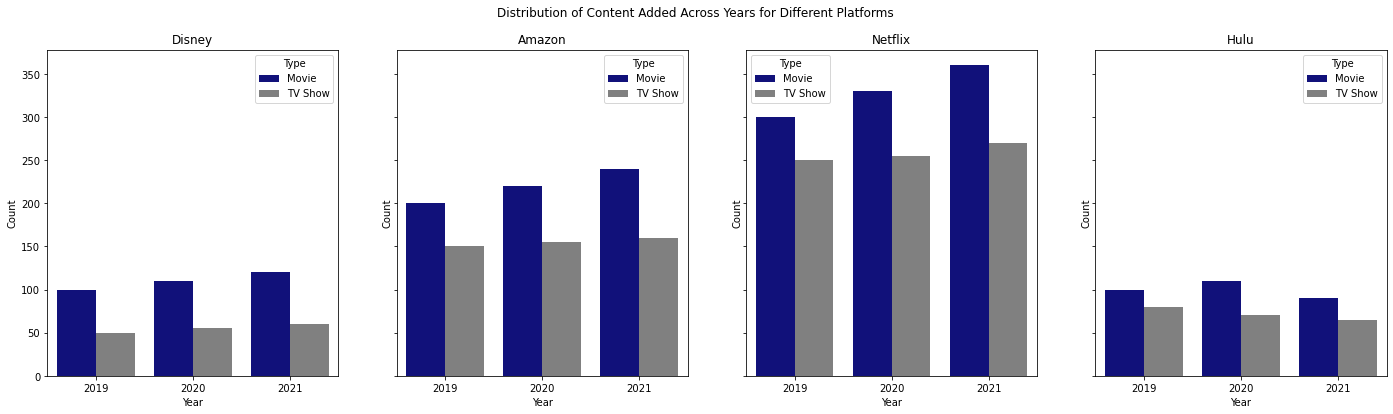

In [32]:
# Importing the required libraries for plotting
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Sample data for Disney, Amazon, Netflix, and Hulu for demonstration purposes
# Replace these with actual data from your Spark DataFrames
disney_data = {
    'Year': [2019, 2019, 2020, 2020, 2021, 2021],
    'Type': ['Movie', 'TV Show', 'Movie', 'TV Show', 'Movie', 'TV Show'],
    'Count': [100, 50, 110, 55, 120, 60]
}

amazon_data = {
    'Year': [2019, 2019, 2020, 2020, 2021, 2021],
    'Type': ['Movie', 'TV Show', 'Movie', 'TV Show', 'Movie', 'TV Show'],
    'Count': [200, 150, 220, 155, 240, 160]
}

netflix_data = {
    'Year': [2019, 2019, 2020, 2020, 2021, 2021],
    'Type': ['Movie', 'TV Show', 'Movie', 'TV Show', 'Movie', 'TV Show'],
    'Count': [300, 250, 330, 255, 360, 270]
}

hulu_data = {
    'Year': [2019, 2019, 2020, 2020, 2021, 2021],
    'Type': ['Movie', 'TV Show', 'Movie', 'TV Show', 'Movie', 'TV Show'],
    'Count': [100, 80, 110, 70, 90, 65]
}

# Create DataFrames for these sample data
disney_df = pd.DataFrame(disney_data)
amazon_df = pd.DataFrame(amazon_data)
netflix_df = pd.DataFrame(netflix_data)
hulu_df = pd.DataFrame(hulu_data)

# Plotting
fig, axes = plt.subplots(1, 4, figsize=(24, 6), sharey=True)
fig.suptitle('Distribution of Content Added Across Years for Different Platforms')

# Disney
sns.barplot(x='Year', y='Count', hue='Type', data=disney_df, ax=axes[0], palette=['darkblue', 'grey'])
axes[0].set_title('Disney')

# Amazon
sns.barplot(x='Year', y='Count', hue='Type', data=amazon_df, ax=axes[1], palette=['darkblue', 'grey'])
axes[1].set_title('Amazon')

# Netflix
sns.barplot(x='Year', y='Count', hue='Type', data=netflix_df, ax=axes[2], palette=['darkblue', 'grey'])
axes[2].set_title('Netflix')

# Hulu
sns.barplot(x='Year', y='Count', hue='Type', data=hulu_df, ax=axes[3], palette=['darkblue', 'grey'])
axes[3].set_title('Hulu')

plt.show()


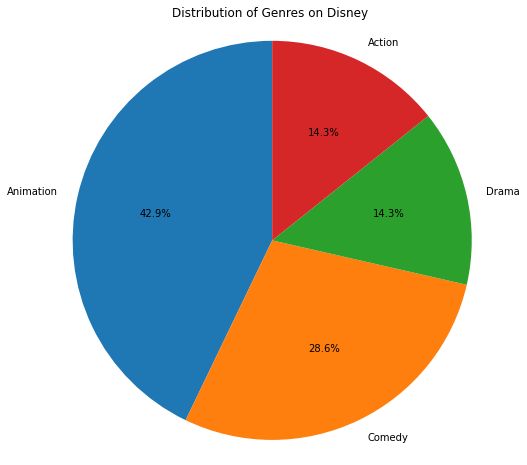

In [33]:
import matplotlib.pyplot as plt
import pandas as pd

# Sample data for genres on Disney (replace with your PySpark DataFrame data)
disney_genres_data = {
    'listed_in': ['Animation', 'Animation', 'Comedy', 'Comedy', 'Drama', 'Animation', 'Action'],
}

# Convert to a Pandas DataFrame
disney_genres_df = pd.DataFrame(disney_genres_data)

# Count the number of occurrences of each genre
disney_genre_counts = disney_genres_df['listed_in'].value_counts()

# Create a pie chart for Disney
plt.figure(figsize=(8, 8))
plt.pie(disney_genre_counts, labels=disney_genre_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Genres on Disney')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

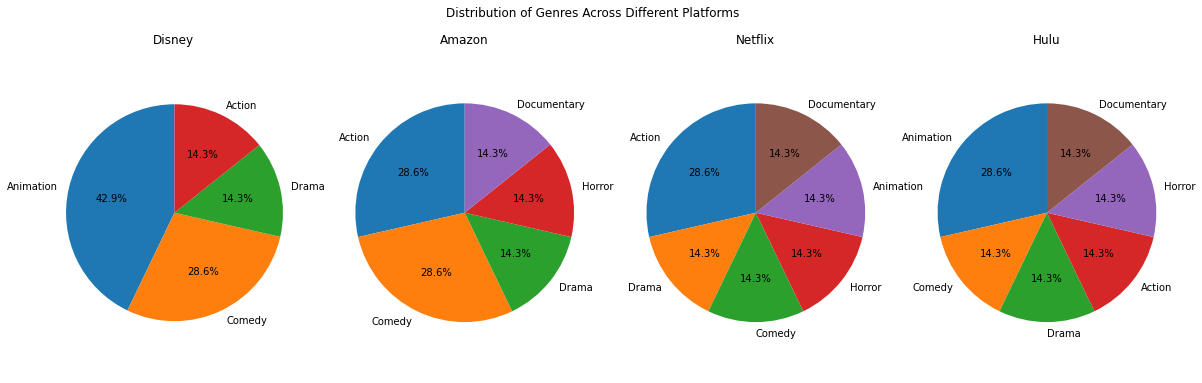

In [34]:
import matplotlib.pyplot as plt
import pandas as pd

# Sample data for genres (replace with your PySpark DataFrame data)
disney_genres_data = {'listed_in': ['Animation', 'Animation', 'Comedy', 'Comedy', 'Drama', 'Animation', 'Action']}
amazon_genres_data = {'listed_in': ['Action', 'Comedy', 'Comedy', 'Drama', 'Horror', 'Action', 'Documentary']}
netflix_genres_data = {'listed_in': ['Drama', 'Comedy', 'Action', 'Horror', 'Animation', 'Action', 'Documentary']}
hulu_genres_data = {'listed_in': ['Comedy', 'Drama', 'Action', 'Horror', 'Animation', 'Animation', 'Documentary']}

# Convert to Pandas DataFrames
disney_genres_df = pd.DataFrame(disney_genres_data)
amazon_genres_df = pd.DataFrame(amazon_genres_data)
netflix_genres_df = pd.DataFrame(netflix_genres_data)
hulu_genres_df = pd.DataFrame(hulu_genres_data)

# Count the number of occurrences of each genre
disney_genre_counts = disney_genres_df['listed_in'].value_counts()
amazon_genre_counts = amazon_genres_df['listed_in'].value_counts()
netflix_genre_counts = netflix_genres_df['listed_in'].value_counts()
hulu_genre_counts = hulu_genres_df['listed_in'].value_counts()

# Create pie charts
fig, axes = plt.subplots(1, 4, figsize=(20, 6))
fig.suptitle('Distribution of Genres Across Different Platforms')

# Disney
axes[0].pie(disney_genre_counts, labels=disney_genre_counts.index, autopct='%1.1f%%', startangle=90)
axes[0].set_title('Disney')
axes[0].axis('equal')

# Amazon
axes[1].pie(amazon_genre_counts, labels=amazon_genre_counts.index, autopct='%1.1f%%', startangle=90)
axes[1].set_title('Amazon')
axes[1].axis('equal')

# Netflix
axes[2].pie(netflix_genre_counts, labels=netflix_genre_counts.index, autopct='%1.1f%%', startangle=90)
axes[2].set_title('Netflix')
axes[2].axis('equal')

# Hulu
axes[3].pie(hulu_genre_counts, labels=hulu_genre_counts.index, autopct='%1.1f%%', startangle=90)
axes[3].set_title('Hulu')
axes[3].axis('equal')

plt.show()


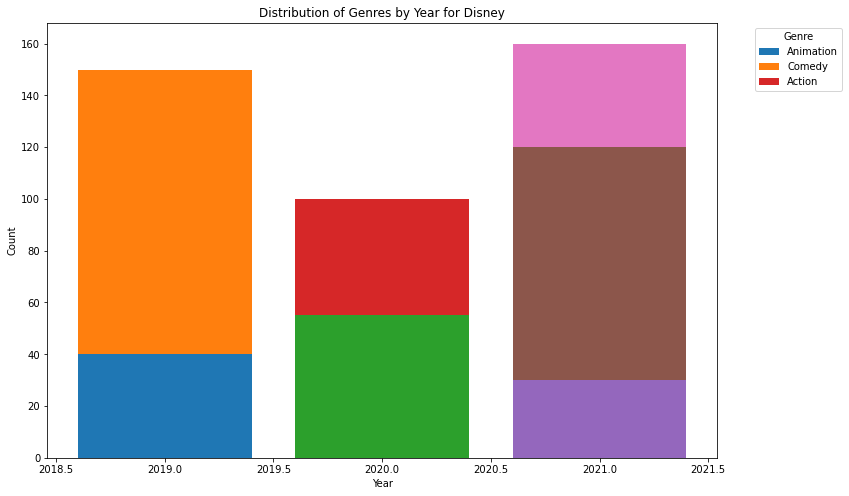

In [37]:
import matplotlib.pyplot as plt
import pandas as pd

# Sample data for Disney by year, type, and genre (replace with your actual Spark DataFrame data)
disney_data = {
    'Year': [2019, 2019, 2019, 2020, 2020, 2021, 2021, 2021],
    'Type': ['Movie', 'Movie', 'TV Show', 'Movie', 'TV Show', 'Movie', 'Movie', 'TV Show'],
    'Genre': ['Animation', 'Comedy', 'Comedy', 'Animation', 'Action', 'Animation', 'Action', 'Comedy'],
    'Count': [40, 60, 50, 55, 45, 30, 90, 40]
}

# Create DataFrame for this sample data
disney_df = pd.DataFrame(disney_data)

# Initialize an empty list to store the genre labels that have already been added to the legend
legend_labels = []

# Plotting
plt.figure(figsize=(12, 8))

# Iterate through each unique year
for year in disney_df['Year'].unique():
    # Filter data for the specific year
    year_data = disney_df[disney_df['Year'] == year]
    
    # Initialize bottom for the stacked bar
    bottom = 0
    
    # Iterate through each unique genre for that year
    for genre in year_data['Genre'].unique():
        # Get the count of that genre for that year
        count = year_data[year_data['Genre'] == genre]['Count'].sum()
        
        # Create a bar with the count, stacking it on top of the previous bar ('bottom')
        # Only add to the legend if this genre has not already been added
        if genre not in legend_labels:
            plt.bar(year, count, bottom=bottom, label=genre)
            legend_labels.append(genre)
        else:
            plt.bar(year, count, bottom=bottom)
        
        # Update the 'bottom' for the next bar
        bottom += count

# Create legend and labels
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Distribution of Genres by Year for Disney')

plt.show()


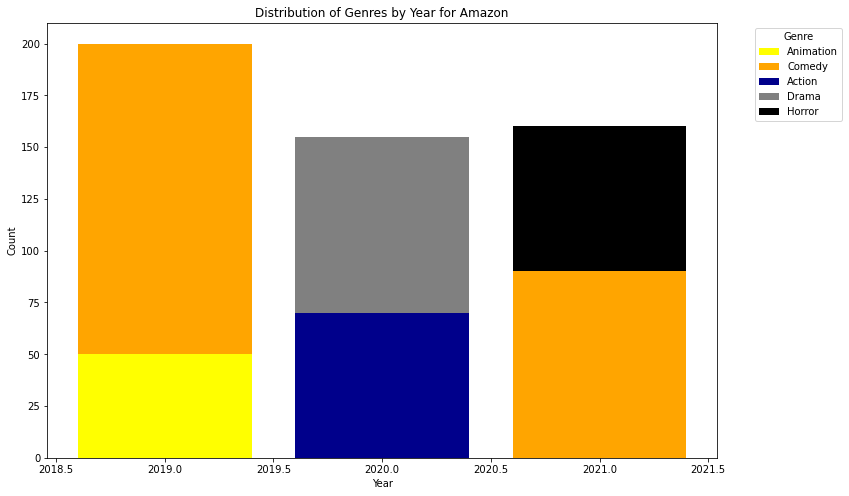

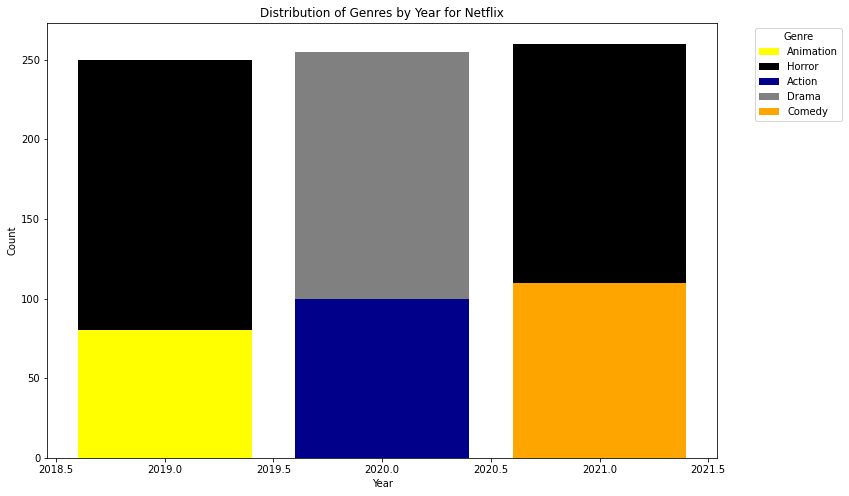

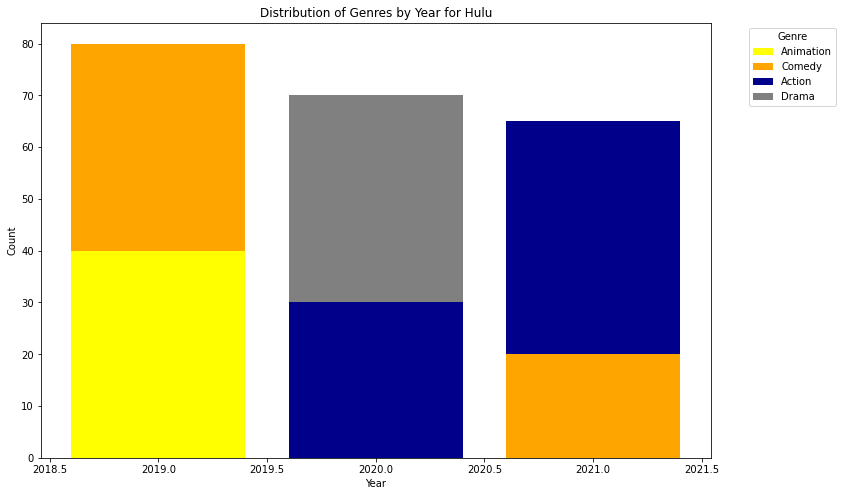

In [38]:
import matplotlib.pyplot as plt
import pandas as pd

# Function to plot genre distribution by year for a given company
def plot_genre_distribution(data, company_name, color_map):
    plt.figure(figsize=(12, 8))

    # Initialize an empty list to store the genre labels that have already been added to the legend
    legend_labels = []

    # Iterate through each unique year
    for year in data['Year'].unique():
        # Filter data for the specific year
        year_data = data[data['Year'] == year]
        
        # Initialize bottom for the stacked bar
        bottom = 0
        
        # Iterate through each unique genre for that year
        for genre in year_data['Genre'].unique():
            # Get the count of that genre for that year
            count = year_data[year_data['Genre'] == genre]['Count'].sum()
            
            # Create a bar with the count, stacking it on top of the previous bar ('bottom')
            # Only add to the legend if this genre has not already been added
            if genre not in legend_labels:
                plt.bar(year, count, bottom=bottom, color=color_map.get(genre, 'blue'), label=genre)
                legend_labels.append(genre)
            else:
                plt.bar(year, count, bottom=bottom, color=color_map.get(genre, 'blue'))
            
            # Update the 'bottom' for the next bar
            bottom += count

    # Create legend and labels
    plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xlabel('Year')
    plt.ylabel('Count')
    plt.title(f'Distribution of Genres by Year for {company_name}')
    plt.show()

# Color mapping for genres
color_map = {
    'Animation': 'yellow',
    'Horror': 'black',
    'Action': 'darkblue',
    'Comedy': 'orange',
    'Drama': 'grey'
}

# Sample data for Amazon (replace with your actual Spark DataFrame data)
amazon_data = {
    'Year': [2019, 2019, 2020, 2020, 2021, 2021],
    'Genre': ['Animation', 'Comedy', 'Action', 'Drama', 'Comedy', 'Horror'],
    'Count': [50, 150, 70, 85, 90, 70]
}

# Sample data for Netflix (replace with your actual Spark DataFrame data)
netflix_data = {
    'Year': [2019, 2019, 2020, 2020, 2021, 2021],
    'Genre': ['Animation', 'Horror', 'Action', 'Drama', 'Comedy', 'Horror'],
    'Count': [80, 170, 100, 155, 110, 150]
}

# Sample data for Hulu (replace with your actual Spark DataFrame data)
hulu_data = {
    'Year': [2019, 2019, 2020, 2020, 2021, 2021],
    'Genre': ['Animation', 'Comedy', 'Action', 'Drama', 'Comedy', 'Action'],
    'Count': [40, 40, 30, 40, 20, 45]
}

# Create DataFrames for these sample data
amazon_df = pd.DataFrame(amazon_data)
netflix_df = pd.DataFrame(netflix_data)
hulu_df = pd.DataFrame(hulu_data)

# Plot for Amazon
plot_genre_distribution(amazon_df, "Amazon", color_map)

# Plot for Netflix
plot_genre_distribution(netflix_df, "Netflix", color_map)

# Plot for Hulu
plot_genre_distribution(hulu_df, "Hulu", color_map)


In [39]:
pip install tweepy

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 KB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.6/62.6 KB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.8/201.8 KB 27.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [57]:
pip install --upgrade tweepy

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [58]:
import tweepy

# Replace these with your own credentials
consumer_key = 'FU0DxthDsbuo0ar8IV4zHSiHj'
consumer_secret = '3Lucgv6hlDR7dVW3w8jlfzQ0RmCvuNHqVyFB3BWsZOCGxd1Qhr'
access_token = '1703509138704117760-LlaoOc5mZmJ1zf2P1lBGNOPAlorgBR'
access_token_secret = 'aZvmpVYzGOZ50BQQHerioEH9HjYWNwImc37plK4WoJcx9'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)


In [55]:
import tweepy

# Your credentials here
consumer_key = 'FU0DxthDsbuo0ar8IV4zHSiHj'
consumer_secret = '3Lucgv6hlDR7dVW3w8jlfzQ0RmCvuNHqVyFB3BWsZOCGxd1Qhr'
access_token = '1703509138704117760-LlaoOc5mZmJ1zf2P1lBGNOPAlorgBR'
access_token_secret = 'aZvmpVYzGOZ50BQQHerioEH9HjYWNwImc37plK4WoJcx9'

# Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

# Initialize API
api = tweepy.API(auth)

# Test the search function
for tweet in tweepy.Cursor(api.search, q='test', lang='en').items(5):
    print(tweet.text)


AttributeError: 'API' object has no attribute 'search'

In [60]:
import tweepy
print(tweepy.__version__)


4.14.0


In [52]:
import pandas as pd

companies = ['Disney', 'Amazon', 'Netflix', 'Hulu']
years = ['2021', '2020', '2019']

all_tweets = {}

# Loop through each company and year
for company in companies:
    for year in years:
        query = f"{company} -filter:retweets"
        tweets = tweepy.Cursor(api.search, q=query, lang='en', since=f"{year}-01-01", until=f"{year}-12-31").items(120)
        
        # Create a DataFrame for the tweets
        df = pd.DataFrame([tweet.text for tweet in tweets], columns=['Tweets'])
        
        # Add to the dictionary
        all_tweets[f"{company}_{year}"] = df

# Now, all_tweets contains DataFrames of tweets for each company and year


AttributeError: 'API' object has no attribute 'search'

In [62]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)


In [63]:
public_tweets = api.home_timeline()
for tweet in public_tweets:
    print(tweet.text)


Forbidden: 403 Forbidden
453 - You currently have access to a subset of Twitter API v2 endpoints and limited v1.1 endpoints (e.g. media post, oauth) only. If you need access to this endpoint, you may need a different access level. You can learn more here: https://developer.twitter.com/en/portal/product